# Project Terget


> To Predict Survivance of Titanic Passenger


###Project will be done by 2 or 3 way
1.  Raw way
2.  Using ColumnTransformation
3.  Using Pipeline(Most Organized way)



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/Titanic-Dataset.csv')
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [ ]:
df=df.drop(columns=['PassengerId','Name','Ticket','Cabin'])
df.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S


#Important Note
##>in this Stage we have to Analyze data by Asking verious Question and Visulize data
##>See Day-15-22 Data Aanlysis NoteBook from Google

In [ ]:
df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0
Embarked,2


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.drop('Survived',axis=1),df['Survived'],test_size=0.2)

In [ ]:
X_train.head(2)
#Sex & Embarked -->Nominal Catagorical--->OneHotEncoding
#Age & Embarked -->Has Missing value --->SimpleImputer or Do Pandas .fillna previous
#Age # Fare --->Scaling(jodi kora lage korte paro nahoi bad)--->StandardScaler/MinMaxScaler
#Reminder Column-->Passthrough

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
781,1,female,17.0,1,0,57.0000,S
25,3,female,38.0,1,5,31.3875,S


#1. Raw Way(Amm Jindigi)

In [ ]:
#missing value Handeling
from sklearn.impute import SimpleImputer
si_age=SimpleImputer()
si_emb=SimpleImputer(strategy='most_frequent')#most_frequent== mode
#stratagy alada ar karone alada object create kora hoise
age_train_imp=si_age.fit_transform(X_train[['Age']])
age_test_imp=si_age.fit_transform(X_test[['Age']])

emb_train_imp=si_emb.fit_transform(X_train[['Embarked']])
emb_test_imp=si_emb.fit_transform(X_test[['Embarked']])

In [ ]:
#Encoding
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(dtype=np.int32,sparse_output=False,handle_unknown='ignore')#ignore->if inFuture new catagories Arise then will ignore(0)
#Though,Embarked contain null value,it's good to use seperate object for SEX & EMBARKED

X_train_enc=ohe.fit_transform(X_train[['Sex']],emb_train_imp)#jeheto Embarked ar missing value impput kore  'emb_train_imp' te rakha hoise(like pipeline)
X_test_enc=ohe.fit_transform(X_test[['Sex']],emb_test_imp)
#sex(2)-1 & embaarked(3)-1 unique value

<Axes: >

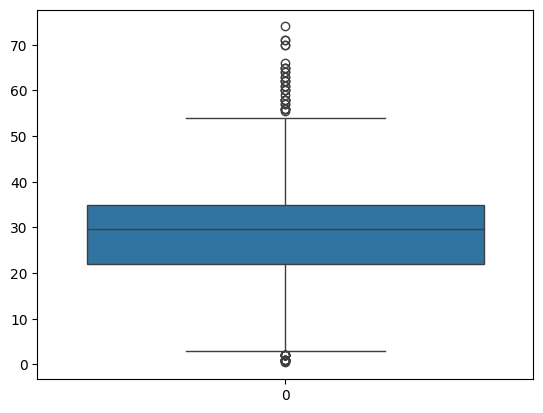

In [ ]:
#analyze which scaling will be best
sns.boxplot(age_train_imp)

<Axes: xlabel='Fare'>

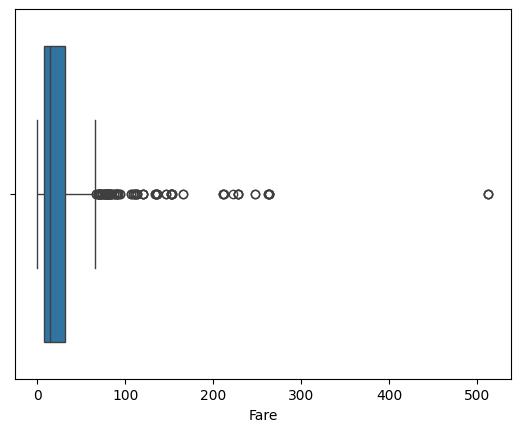

In [ ]:
sns.boxplot(data=df,x='Fare')

In [ ]:
#যদি scaling দরকার হয় তাহলে আমরা scale করতে পারি
#যদিও Age এবং Fare এর scaling এর তেমন দরকার নেই, তবুও আমরা বোঝার জন্য ব্যবহার করার চেষ্টা করি
#Age --> StandardScaler এবং Fare --> RobustScaler

from sklearn.preprocessing import StandardScaler,RobustScaler

ss=StandardScaler()
rs=RobustScaler()

age_train_slr=ss.fit_transform(age_train_imp)#যেহেতু Embarked এর missing value imput করে 'age_train_imp' তে রাখা হয়েছে (like pipeline)
age_test_slr=ss.fit_transform(age_test_imp)

fare_train_slr=rs.fit_transform(X_train[['Fare']])
fare_test_slr=rs.fit_transform(X_test[['Fare']])

In [ ]:
X_train.head(2)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
781,1,female,17.0,1,0,57.0000,S
25,3,female,38.0,1,5,31.3875,S


In [ ]:
#now Concatinate or hstack all
X_train_tf=np.hstack((X_train[['Pclass','SibSp','Parch','Age','Fare']],X_train_enc))
X_test_tf=np.hstack((X_test[['Pclass','SibSp','Parch','Age','Fare']],X_test_enc))
X_train_tf.shape


#accuracy=77.somthing

(712, 7)

In [ ]:
#now Concatinate or hstack all
# X_train_tf=np.hstack((X_train[['Pclass','SibSp','Parch']],age_train_slr,fare_train_slr,X_train_enc))
# X_test_tf=np.hstack((X_test[['Pclass','SibSp','Parch']],age_test_slr,fare_test_slr,X_test_enc))
# X_train_tf.shape

#accuracy=74.somthing with "MULTICOLLinearity"

In [ ]:
#now Concatinate or hstack all
# X_train_tf=np.concatenate((X_train[['Pclass','SibSp','Parch']],age_train_slr,fare_train_slr,X_train_enc),axis=1)
# X_test_tf=np.concatenate((X_test[['Pclass','SibSp','Parch']],age_test_slr,fare_test_slr,X_test_enc),axis=1)
# X_train_tf.shape

In [ ]:
#Now, Constract Machine-Learning Model
from sklearn.linear_model import LogisticRegression #Survived is Nominal catagorical (0,1)
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
clf.fit(X_train_tf,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred=clf.predict(X_test_tf)

In [ ]:
#find accuricy
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.770949720670391

In [ ]:
df.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S


In [ ]:
#এখন এই model টা যাবে production level এ (.pkl)
#তারপর ওইখানে যখন user data input দিবে যেমন \[0 3 male 22.0 1 0 7.2500 S] তখন আমাদের আবার Sex এবং Embarked কে Encode করতে হবে
#তারপর আবার concatinate বা hstack করতে হবে
#তারপর predict করতে হবে

#যদি কখনো model এ change করতে হয় এটা খুব জটিল হয়ে যায় তাই এর সমাধান হিসেবে "PIPELINE" Use করা হয়


#2| ColumnTransformer (Mantos Jindigi Lite)

In [ ]:
from sklearn.compose import ColumnTransformer
tf=ColumnTransformer(transformers=[
    ('tf1',SimpleImputer(),['Age']),('tf2',SimpleImputer(strategy='most_frequent'),['Embarked']),
    ('tf4',OneHotEncoder(dtype=np.int32,sparse_output=False,handle_unknown='ignore'),['Sex','tf2'])#amra chacci modified Embarked pass hoi kinto tf2 dataset ar kono column noi,ata vul hobe
    #এখানে Embarked এর missing value আগে impute হবে না যদি encode ও impute একসাথে করা হয়।
    #যদি Embarked প্রথমে impute → তারপর encode করতে চান, তাহলে Pipeline এর ভিতরে SimpleImputer ও OneHotEncoder একত্রে রাখতে হবে।
],remainder='passthrough')

#3-1| Pipeline-1(not Stable) (Mantos Jindigi)[Moja ar Moja]

In [ ]:
df.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.drop(['Survived'],axis=1),df['Survived'],test_size=0.2, random_state=42)

In [ ]:
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
709,3,male,NaN,1,1,15.2458,C
439,2,male,31.0,0,0,10.5000,S
840,3,male,20.0,0,0,7.9250,S
720,2,female,6.0,0,1,33.0000,S
39,3,female,14.0,1,0,11.2417,C


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.compose import  ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline,make_pipeline

In [ ]:
#Hendel Missing value Using Column transformer

tf1=ColumnTransformer([
    ('age_imp',SimpleImputer(),[2]),
    ('emb_imp',SimpleImputer(strategy='most_frequent'),[6])
],remainder='passthrough')

#use index instade of columnName,cause next

In [ ]:
#Encoding

tf2=ColumnTransformer([
    ('sex_emb_enc',OneHotEncoder(dtype=np.int32,sparse_output=False,handle_unknown='ignore',drop='first'),[1,6])
],remainder='passthrough')

In [ ]:
#Scaling

tf3=ColumnTransformer([
    ('all_scal',MinMaxScaler(),slice(0,8))
])# ai khane remainder='passthrough' use korle error ashbe

In [ ]:
#Feature Selection

tf4=SelectKBest(score_func=chi2,k=8)

In [ ]:
#Model Training

tf5=DecisionTreeClassifier()

In [ ]:
pipe=Pipeline([
    ('impute',tf1),
    ('encode',tf2),
    ('scaling',tf3),
    ('F_select',tf4),
    ('model_train',tf5)
])

In [ ]:
#Alternative Syntex
# pipe=make_pipeline(tf1,tf2,tf3,tf4,tf5)

In [ ]:
#

pipe.fit(X_train,y_train)

Pipeline(steps=[('impute',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('age_imp', SimpleImputer(),
                                                  [2]),
                                                 ('emb_imp',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [6])])),
                ('encode',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('sex_emb_enc',
                                                  OneHotEncoder(drop='first',
                                                                dtype=<class 'numpy.int32'>,
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [1, 6])])),
                ('scaling',
                 ColumnTransformer(transformers=[('all_scal', MinMaxScaler(),
                                                  slice(0, 8, None))])),
                ('F_select',
                 SelectKBest(k=8,
                             score_func=<function chi2 at 0x7c319269e3e0>)),
                ('model_train', DecisionTreeClassifier())])

In [ ]:
#predict
y_pred=pipe.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [ ]:
#Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6256983240223464

#3-2| Pipeline-2(Stable) (Mantos Jindigi)[Moja ar Moja]


> You Should Always Use This Method
#See more in Function and Power Transformation.ipynb(Day-30-31)

## Algorithm of Pipeline(Me)
```
#Pre-Knowledge

> Pipelline Takes List of Tupples and each Tupple take two value:
('anyname',Transfomer-Function)

> ColumnTransfomer Takes List of Tupples and each Tupple take 3 value:('anyname',Transfomer-Function,[index names])


1.   First,makes pipeline for each individul column that need to be Transform

    *   Age --->missing value handeling-->Function/Power Transfrom (if needed)
    *   Fare--->Function/Power Transform
    *   Embarked---> missing value handeling --->Encoding
    *   Sex ---->Encoding

2.   Second,Pass all Pipeline into A columnTransformer as Trasnfomer-Function with Proper index to Transform and Others Column/index will passthrough

3.   3rd,Make a Final Pipeline

    *   pass the ColumnTransformer(2nd step),
    *   ('scaling',SimpleImputer()),      [if need scaling]
    *   ------------------------------
    *   ------------------------------
    *   ('feture_select',SelectKbest()),
    *   ('model',LogisticRegression())

```






In [ ]:
df.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.drop(['Survived'],axis=1),df['Survived'],test_size=0.2, random_state=42)
X_train.head(2)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
331,1,male,45.5,0,0,28.5,S
733,2,male,23.0,0,0,13.0,S


In [ ]:
#Age --->missing value handeling
age_pipe=Pipeline([
    ('age_imp',SimpleImputer())
])

In [ ]:
#Embarked---> missing value handeling --->Encoding

emb_pipe=Pipeline([
    ('emb_imp',SimpleImputer(strategy='most_frequent')),
    ('emb_ohe',OneHotEncoder(dtype=np.int32,drop='first',sparse_output=False,handle_unknown='ignore'))
])

In [ ]:
#Sex ---->Encoding

sex_pipe=Pipeline([
    ('sex_ohe',OneHotEncoder(dtype=np.int32,drop='first',sparse_output=False,handle_unknown='ignore'))
])


#aikhane Sex ar jonne alada pipeline and Embarked ar jonne alada pipeline kora. Tobe Akshte korle shobche valo hoi

In [ ]:
#Second,Pass all Pipeline into A columnTransformer as Trasnfomer-Function with Proper index to Transform and Others Column/index will passthrough

#Note: Amra ata use korbo
preprocessed=ColumnTransformer([
    ('age_pipe',age_pipe,['Age']),
    ('emb_pipe',emb_pipe,['Embarked']),
    ('sex_pipe',sex_pipe,['Sex'])
],remainder='passthrough')

In [ ]:
preprocessed.fit_transform(X_train)

array([[ 45.5   ,   0.    ,   1.    , ...,   0.    ,   0.    ,  28.5   ],
       [ 23.    ,   0.    ,   1.    , ...,   0.    ,   0.    ,  13.    ],
       [ 32.    ,   0.    ,   1.    , ...,   0.    ,   0.    ,   7.925 ],
       ...,
       [ 41.    ,   0.    ,   1.    , ...,   2.    ,   0.    ,  14.1083],
       [ 14.    ,   0.    ,   1.    , ...,   1.    ,   2.    , 120.    ],
       [ 21.    ,   0.    ,   1.    , ...,   0.    ,   1.    ,  77.2875]])

In [ ]:
#Note: ata o use kora jai but amra ata use korbo na


# preprocess=ColumnTransformer([
#     ('age_pipe',age_pipe,['Age']),
#     ('emb_pipe',emb_pipe,['Embarked']),
#     ('sex_pipe',sex_pipe,['Sex']),
#     ('pass','passthrough',['Pclass'	,'SibSp','Parch','Fare'])
# ])


# preprocess.fit_transform(X_train)

In [ ]:
#3rd : Final Pipeline

pipe=Pipeline([
    ('preprocessed',preprocessed),
    ('scaling_all',StandardScaler()),
    ('model',LogisticRegression())
])

In [ ]:
pipe.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessed',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('age_pipe',
                                                  Pipeline(steps=[('age_imp',
                                                                   SimpleImputer())]),
                                                  ['Age']),
                                                 ('emb_pipe',
                                                  Pipeline(steps=[('emb_imp',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('emb_ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 dtype=<class 'numpy.int32'>,
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Embarked']),
                                                 ('sex_pipe',
                                                  Pipeline(steps=[('sex_ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 dtype=<class 'numpy.int32'>,
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Sex'])])),
                ('scaling_all', StandardScaler()),
                ('model', LogisticRegression())])

In [ ]:
y_pred=pipe.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.8100558659217877

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(pipe,X_train,y_train,cv=5,scoring='accuracy').mean()

np.float64(0.7906628582684921)

#Cross Validation  Using Pipeline
(future a pora hobe)

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(pipe,X_train,y_train,cv=5,scoring='accuracy').mean()

np.float64(0.7906628582684921)

#GridSearch Using Pipeline(Future Learning)

#Export The Pipeline to Production Level

In [ ]:
#Export
import pickle
pickle.dump(pipe,open('pipe.pkl','wb'))

## Then Open New NoteBook and Do Following Setps for production

In [ ]:
import pickle
import numpy as np

In [ ]:
pipe=pickle.load(open('pipe.pkl','rb'))

In [ ]:
# test_input=np.array([3,'female',14.0,1,0,11.2417,'C'],dtype=object).reshape(1,7)


#ai vabe age age kaj korto jokhon Pipeline-1 use korci but Pipeline-2 a hocce na tai nicher ta use koro

In [ ]:
test_input = pd.DataFrame([{
    'Pclass': 3,
    'Sex': 'male',
    'Age': 22,
    'SibSp': 1,
    'Parch': 0,
    'Fare': 7.25,
    'Embarked': 'S'
}])


In [ ]:
pipe.predict(test_input)

array([0])

#kono kico change korle just Column transformatin a change korle ei kaj hoia jabe .ar kothw change korte hobe na